<a href="https://colab.research.google.com/github/maruwrks/Deep-Learning-Task/blob/main/Basic_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install keras-tuner
#!pip install scikeras
#!pip install --upgrade scikeras scikit-learn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

##Data Preparation

In [2]:
np.random.seed(42)
tf.random.set_seed(42)

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Deep Learning/RegresiUTSTelkom.csv')
print(f"Data shape: {df.shape}")
display(df.head(5))

Data shape: (515344, 91)


,2001,49.94357,21.47114,73.0775,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.0162,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
0,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
1,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
2,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
3,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
4,2001,50.54767,0.31568,92.35066,22.38696,-25.51870,-19.04928,20.67345,-5.19943,3.63566,...,6.59753,-50.69577,26.02574,18.94430,-0.33730,6.09352,35.18381,5.00283,-11.02257,0.02263


In [4]:
df.dtypes
df.describe()

,2001,49.94357,21.47114,73.0775,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.0162,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
count,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,...,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000
mean,1998.397077,43.387113,1.289515,8.658222,1.164110,-6.553580,-9.521968,-2.391046,-1.793215,3.727868,...,15.755411,-73.461537,41.542388,37.934163,0.315750,17.669292,-26.315520,4.458653,20.035229,1.329104
std,10.931056,6.067557,51.580393,35.268505,16.322802,22.860803,12.857763,14.571853,7.963822,10.582869,...,32.099666,175.619058,122.228915,95.050718,16.161780,114.428002,173.977455,13.346567,185.558415,22.088598
min,1922.000000,1.749000,-337.092500,-301.005060,-154.183580,-181.953370,-81.794290,-188.214000,-72.503850,-126.479040,...,-437.722030,-4402.376440,-1810.689190,-3098.350310,-341.789120,-3168.924570,-4319.992320,-236.039260,-7458.378150,-381.424430
25%,1994.000000,39.954667,-26.059848,-11.462775,-8.487507,-20.666455,-18.441005,-10.780360,-6.468390,-2.293670,...,-1.812658,-139.555737,-20.987115,-4.669655,-6.781598,-31.580617,-101.530305,-2.566137,-59.509453,-8.820248
50%,2002.000000,44.258490,8.417725,10.476235,-0.652855,-6.007770,-11.188355,-2.046625,-1.736415,3.822305,...,9.171850,-53.089115,28.790580,33.623815,0.820830,15.598520,-21.204225,3.117645,7.759910,0.053015
75%,2006.000000,47.833875,36.124030,29.764685,8.787548,7.741877,-2.388945,6.508587,2.913455,9.961865,...,26.274487,13.478793,89.661785,77.785810,8.471000,67.795110,52.389322,9.967742,86.351645,9.679540
max,2011.000000,61.970140,384.065730,322.851430,335.771820,262.068870,166.236890,172.402680,126.741270,146.297950,...,840.973380,4469.454870,3210.701700,1734.079690,260.544900,3662.065650,2833.608950,463.419500,7393.398440,677.899630


In [5]:
target_col = df.columns[0]
features = df.columns[1:]  # All columns except first
print(f"\nTarget column: {target_col}")


Target column: 2001


## Preprocessing

In [6]:
df.isnull().sum().sum()
df = df.dropna()

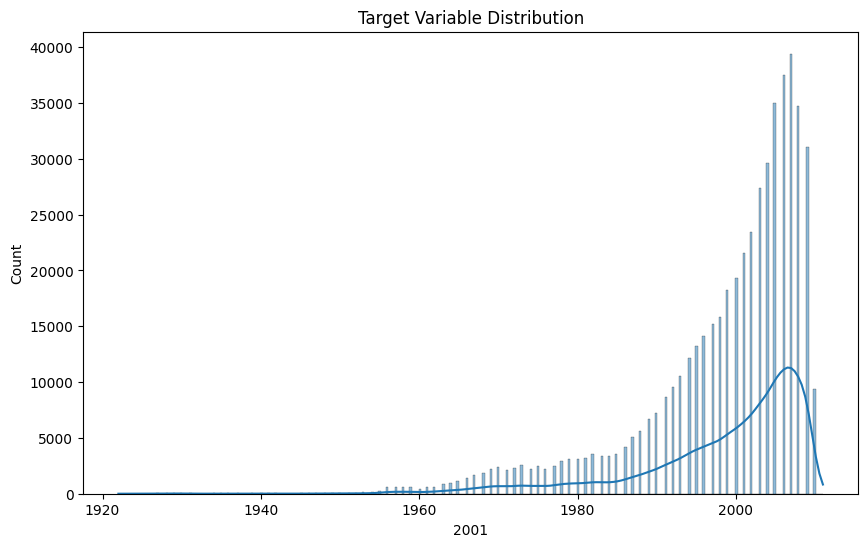

In [7]:
plt.figure(figsize=(10,6))
sns.histplot(df[df.columns[0]], kde=True)
plt.title('Target Variable Distribution')
plt.show()

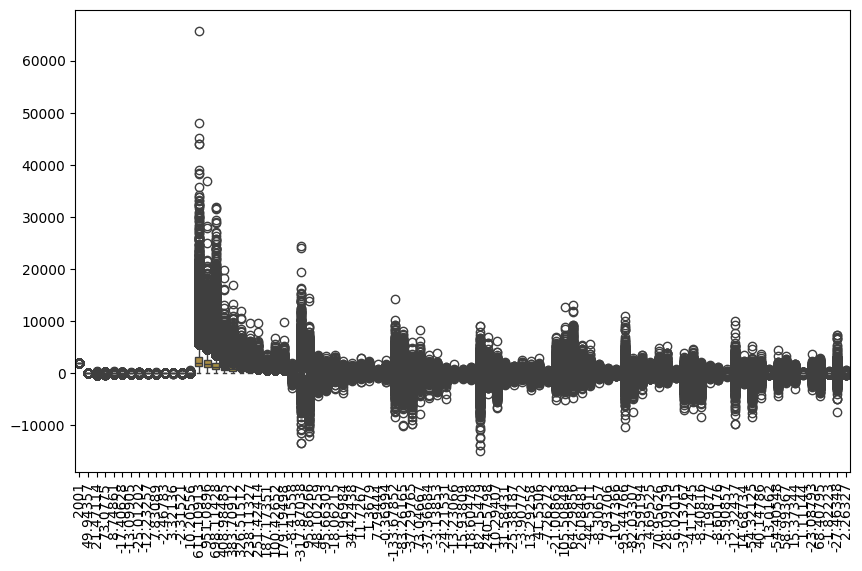

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

In [9]:
print(f"Data shape before preprocessing: {df.shape}")

Data shape before preprocessing: (515344, 91)


## Feature Enginering

In [10]:
z_scores = np.abs((df[features] - df[features].mean()) / df[features].std())
df = df[(z_scores < 3).all(axis=1)]
print(f"Data shape after preprocessing: {df.shape}")

Data shape after preprocessing: (372528, 91)


In [11]:
X = df[features].values
Y = df[target_col].values

In [12]:
y_series = (Y > np.median(Y)).astype(int)
y = pd.Series(y_series)
print(y.value_counts())

0    200291
1    172237
Name: count, dtype: int64


In [13]:
scaler = StandardScaler()
X = scaler.fit_transform(df[features])

## Data Modeling

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
print(f"\nTrain shape: {X_train.shape}")
print(f"Test shape: {X_test.shape}")


Train shape: (298022, 90)
Test shape: (74506, 90)


In [16]:
inputs = Input(shape=(X_train.shape[1],))

x = inputs

x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

x = Dense(64, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

x = Dense(32, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

outputs = Dense(1, activation='linear')(x)
model = Model(inputs=inputs, outputs=outputs)

In [17]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='mse',
              metrics=['mae', tf.keras.metrics.RootMeanSquaredError()])

In [18]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=512,
                    validation_split=0.2,
                    callbacks=[early_stop],
                    verbose=1)

Epoch 1/50
466/466 ━━━━━━━━━━━━━━━━━━━━ 25s 38ms/step - loss: 2.5429 - mae: 1.2010 - root_mean_squared_error: 1.5874 - val_loss: 0.3797 - val_mae: 0.5101 - val_root_mean_squared_error: 0.6162
Epoch 2/50
466/466 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - loss: 1.1364 - mae: 0.8034 - root_mean_squared_error: 1.0655 - val_loss: 0.2830 - val_mae: 0.4646 - val_root_mean_squared_error: 0.5320
Epoch 3/50
466/466 ━━━━━━━━━━━━━━━━━━━━ 21s 38ms/step - loss: 0.8200 - mae: 0.6831 - root_mean_squared_error: 0.9054 - val_loss: 0.2461 - val_mae: 0.4523 - val_root_mean_squared_error: 0.4961
Epoch 4/50
466/466 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - loss: 0.6706 - mae: 0.6226 - root_mean_squared_error: 0.8188 - val_loss: 0.2310 - val_mae: 0.4456 - val_root_mean_squared_error: 0.4807
Epoch 5/50
466/466 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - loss: 0.5602 - mae: 0.5767 - root_mean_squared_error: 0.7483 - val_loss: 0.2201 - val_mae: 0.4368 - val_root_mean_squared_error: 0.4692
Epoch 6/50
466/466 ━━━━━━━━━━━━━━━━━━━━ 

In [19]:
y_pred = model.predict(X_test).flatten()

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

2329/2329 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


In [20]:
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R² Score: {r2:.4f} ({r2:.2%})")

# 9. Check y and pred ranges
y_min = np.min(y_test)
y_max = np.max(y_test)
y_range = y_max - y_min

pred_min = np.min(y_pred)
pred_max = np.max(y_pred)
pred_range = pred_max - pred_min

print(f"\ny_min: {y_min:.2f}, y_max: {y_max:.2f}, Rentang y_test: {y_range:.2f}")
print(f"pred_min: {pred_min:.2f}, pred_max: {pred_max:.2f}, Rentang y_pred: {pred_range:.2f}")

MSE: 0.1680
RMSE: 0.4099
MAE: 0.3255
R² Score: 0.3236 (32.36%)

y_min: 0.00, y_max: 1.00, Rentang y_test: 1.00
pred_min: -0.04, pred_max: 1.11, Rentang y_pred: 1.15


## Visualize

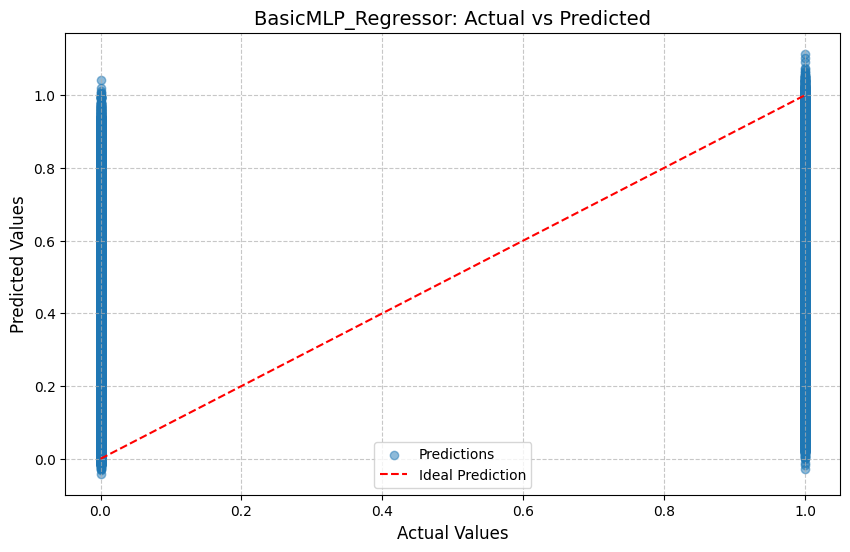

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label='Predictions')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', label='Ideal Prediction')
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.title('BasicMLP_Regressor: Actual vs Predicted', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## Penjelasan

## Pipeline End-to-End Prediksi Regresi

## 1. Pengumpulan dan Persiapan Data

* **Pemeriksaan Awal**: Data diperiksa untuk memahami bentuk data (dimensi), melihat contoh data awal (5 baris pertama), tipe data setiap kolom, dan statistik deskriptif untuk mengetahui rentang, rata-rata, standar deviasi, dll. dari setiap fitur numerik.
* **Identifikasi Variabel**: Variabel pertama dalam dataset ditetapkan sebagai variabel target (`target_col`), sementara kolom lainnya dijadikan sebagai fitur-fitur atau variabel independen (`features`).
* **Penanganan Missing Value**: Baris data yang mengandung nilai yang hilang (`missing values`) dihapus dari dataset.
* **Analisis Distribusi**: Distribusi dari variabel target divisualisasikan menggunakan histogram. *Box plot* digunakan untuk mendeteksi *outlier* pada setiap fitur.

## 2. Pra-pemrosesan Data

* **Penanganan *Outlier***: Data yang dianggap sebagai *outlier* diidentifikasi dan dihapus. *Outlier* didefinisikan sebagai titik data yang berada di luar 3 standar deviasi dari rata-rata pada setiap fitur numerik.
    * Rumus Z-score:  
$$Z = \frac{x - \mu}{\sigma}$$

* **Standarisasi**: Fitur-fitur numerik distandarisasi menggunakan `StandardScaler`. Proses ini mengubah data sedemikian rupa sehingga memiliki rata-rata 0 dan deviasi standar 1.
    * Rumus Standarisasi:  
$$x_{\text{std}} = \frac{x - \mu}{\sigma}$$

* **Transformasi Target**: Variabel target diubah menjadi variabel biner (0 atau 1). Nilai 1 diberikan jika nilai variabel target di atas median, dan 0 jika di bawah atau sama dengan median.
* **Pembagian Data**: Dataset dibagi menjadi data latih (80%) dan data uji (20%) menggunakan `train_test_split` dengan `random_state=42` untuk memastikan hasil yang dapat direplikasi.

## 3. Pembuatan Model

* **Arsitektur Model**: Model regresi yang digunakan adalah *Multilayer Perceptron* (MLP) yang dibangun menggunakan TensorFlow/Keras.
* **Lapisan**: Model memiliki beberapa lapisan *dense* (terhubung penuh) dengan jumlah neuron yang berkurang secara bertahap (512, 256, 128, 64, 32).
* **Fungsi Aktivasi**: Setiap lapisan tersembunyi menggunakan fungsi aktivasi ReLU (*Rectified Linear Unit*). Lapisan output menggunakan fungsi aktivasi linear.
* **Regularisasi**: *Batch Normalization* dan *Dropout* digunakan untuk mencegah *overfitting*.
* **Optimizer**: Digunakan optimizer Adam dengan *learning rate* 0.0001.
* **Fungsi Loss**: Fungsi *loss* yang digunakan adalah Mean Squared Error (MSE).
* **Metrik Evaluasi**: MAE (*Mean Absolute Error*) dan RMSE (*Root Mean Squared Error*) digunakan sebagai metrik tambahan.

## 4. Pelatihan Model

Model dilatih dengan menggunakan data latih dan divalidasi dengan sebagian data latih (20%). Proses pelatihan dihentikan secara otomatis jika *loss* pada data validasi tidak mengalami penurunan selama 10 epoch berturut-turut (`EarlyStopping`).

## 5. Evaluasi Model

* **Metrik Evaluasi**:
    * **Mean Squared Error (MSE)**:  
$$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$  

    * **Root Mean Squared Error (RMSE)**:  
$$\text{RMSE} = \sqrt{\text{MSE}}$$  

    * **Mean Absolute Error (MAE)**:  
$$\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|$$

    * **R-squared (R²)**: Menunjukkan proporsi variansi dalam variabel dependen yang dijelaskan oleh variabel independen
  
$$R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$$

* **Interpretasi**: Nilai MSE, RMSE, MAE, dan R² dihitung untuk mengukur kinerja model pada data uji. RMSE memberikan ukuran error dengan skala yang sama dengan variabel target, sementara R² mengindikasikan seberapa baik model dapat menjelaskan variabilitas data.

## 6. Visualisasi Hasil

* **Scatter Plot**: *Scatter plot* yang menampilkan nilai aktual (sumbu x) versus nilai prediksi (sumbu y) divisualisasikan untuk mengamati seberapa baik model memprediksi nilai target. Sebuah garis diagonal ditampilkan untuk menunjukkan prediksi sempurna.

## Matriks Evaluasi

| Metrik    | Nilai        |
|-----------|--------------|
| MSE       | 0.1680 |
| RMSE      | 0.4099 |
| MAE       | 0.3255 |
| R²        | 0.3236 |

## Matriks Terbaik

RMSE dan R² umumnya merupakan metrik yang baik untuk mengevaluasi model regresi. RMSE memberikan gambaran tentang besarnya error dalam prediksi dalam skala yang sama dengan target variabel, sedangkan R² menunjukkan proporsi variansi data yang dijelaskan oleh model.